## Notebook for cleaning & exploring the dataset, and then run 3 different models: Decision Tree, Logistic Regression and Nearest Neighbor. Scores are given at the last cell

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

## Billboard Dataset Exploration for 2000-2017

In [269]:
data_sp = pd.read_excel("spotify_project_final v2.0.xlsx")
data_sp.head()

,Year,Artist,Track,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time_Signature,Track_Popularity,Artist_Popularity,main_genre
0,1960,Percy Faith,Theme from A Summer Place,0.466,0.3890,5,-12.825,1,0.0253,0.631,0.843000,0.295,0.749,92.631,144893,4,52,50,NaN
1,1960,Jim Reeves,Hell Have to Go,0.554,0.1860,1,-15.846,1,0.0379,0.909,0.001440,0.110,0.200,81.181,138640,3,58,58,jazz
2,1960,The Everly Brothers,Cathys Clown,0.498,0.5820,7,-8.961,1,0.0339,0.412,0.000000,0.372,0.866,119.809,144013,4,51,61,NaN
3,1960,Johnny Preston,Running Bear,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158200,4,39,34,NaN
4,1960,Mark Dinning,Teen Angel,0.570,0.0636,0,-18.548,1,0.0459,0.936,0.000000,0.122,0.282,101.517,159893,4,22,22,NaN


In [270]:
# Drop BB songs prior to year 2000
data_sp.drop(data_sp.index[:3994], inplace=True)
data_sp.head(10)

,Year,Artist,Track,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time_Signature,Track_Popularity,Artist_Popularity,main_genre
3994,2000,Faith Hill,Breathe,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547,4,62,66,soul
3995,2000,Santana featuring Rob Thomas,Smooth,0.000,0.000,0,0.000,0,0.0000,0.00000,0.000000,0.0000,0.000,0.000,0,0,0,0,NaN
3996,2000,Santana featuring The Product G&B,Maria Maria,0.000,0.000,0,0.000,0,0.0000,0.00000,0.000000,0.0000,0.000,0.000,0,0,0,0,NaN
3997,2000,Joe,I Wanna Know,0.725,0.487,8,-5.959,0,0.0368,0.26000,0.000011,0.4310,0.599,136.086,296693,4,64,76,NaN
3998,2000,Vertical Horizon,Everything You Want,0.637,0.759,3,-6.389,0,0.0305,0.05040,0.000000,0.0642,0.741,93.898,257067,4,65,57,NaN
3999,2000,Destinys Child,Say My Name,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,271333,4,0,0,NaN
4000,2000,Savage Garden,I Knew I Loved You,0.556,0.517,9,-8.769,1,0.0287,0.30700,0.001150,0.0770,0.779,169.938,251253,4,64,67,0
4001,2000,Lonestar,Amazed,0.557,0.553,1,-7.954,1,0.0319,0.24700,0.000000,0.1250,0.253,139.821,239987,4,65,62,NaN
4002,2000,Matchbox Twenty,Bent,0.518,0.830,6,-6.814,0,0.0386,0.04040,0.000004,0.3750,0.527,95.468,256133,4,52,70,rock
4003,2000,Toni Braxton,He Wasnt Man Enough,0.739,0.947,11,-1.915,0,0.0412,0.00947,0.000030,0.3260,0.763,88.009,261933,4,65,67,0


In [274]:
# drop unnecessary columns & reset index 
bb=data_sp.drop(columns=['Time_Signature','Duration_ms','main_genre'])
bb.reset_index(inplace=True)
newbb=bb.drop(columns=['index'])
sLength = len(bb['Year'])
newbb['Billbord Hot']=pd.Series(np.ones(sLength), index=bb.index)
newbb

,Year,Artist,Track,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track_Popularity,Artist_Popularity,Billbord Hot
0,2000,Faith Hill,Breathe,0.529,0.496,7,-9.007,1,0.0290,0.173000,0.000000,0.2510,0.2780,136.859,62,66,1.0
1,2000,Santana featuring Rob Thomas,Smooth,0.000,0.000,0,0.000,0,0.0000,0.000000,0.000000,0.0000,0.0000,0.000,0,0,1.0
2,2000,Santana featuring The Product G&B,Maria Maria,0.000,0.000,0,0.000,0,0.0000,0.000000,0.000000,0.0000,0.0000,0.000,0,0,1.0
3,2000,Joe,I Wanna Know,0.725,0.487,8,-5.959,0,0.0368,0.260000,0.000011,0.4310,0.5990,136.086,64,76,1.0
4,2000,Vertical Horizon,Everything You Want,0.637,0.759,3,-6.389,0,0.0305,0.050400,0.000000,0.0642,0.7410,93.898,65,57,1.0
5,2000,Destinys Child,Say My Name,0.713,0.678,5,-3.525,0,0.1020,0.273000,0.000000,0.1490,0.7340,138.009,0,0,1.0
6,2000,Savage Garden,I Knew I Loved You,0.556,0.517,9,-8.769,1,0.0287,0.307000,0.001150,0.0770,0.7790,169.938,64,67,1.0
7,2000,Lonestar,Amazed,0.557,0.553,1,-7.954,1,0.0319,0.247000,0.000000,0.1250,0.2530,139.821,65,62,1.0
8,2000,Matchbox Twenty,Bent,0.518,0.830,6,-6.814,0,0.0386,0.040400,0.000004,0.3750,0.5270,95.468,52,70,1.0
9,2000,Toni Braxton,He Wasnt Man Enough,0.739,0.947,11,-1.915,0,0.0412,0.009470,0.000030,0.3260,0.7630,88.009,65,67,1.0


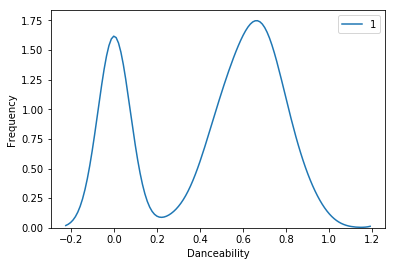

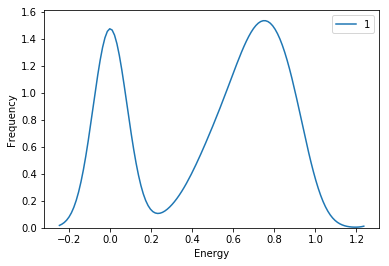

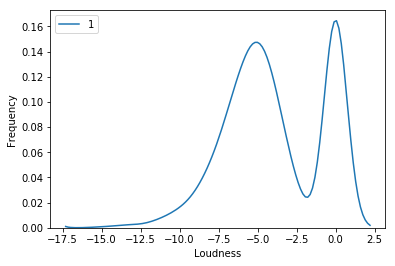

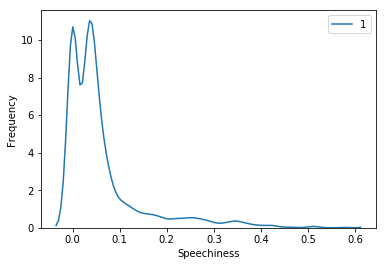

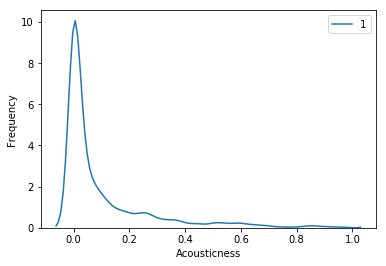

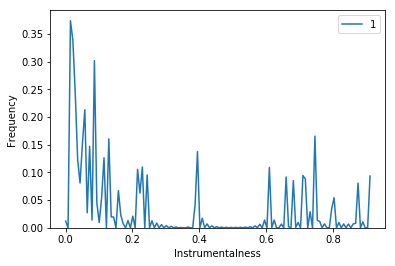

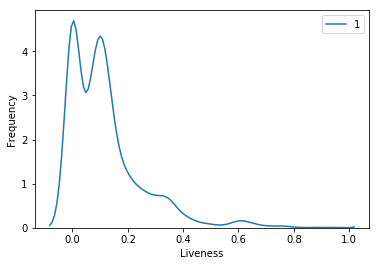

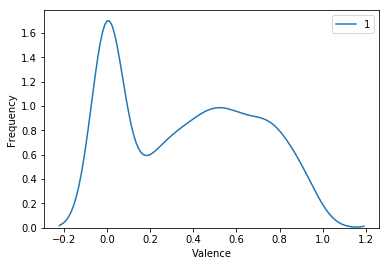

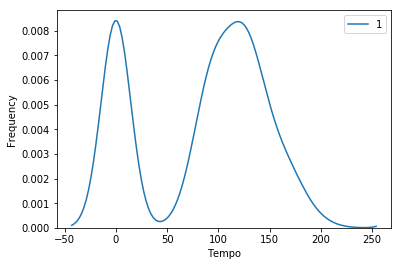

In [272]:
def frequency(col):
    plot = sns.kdeplot(data_sp[col])
    plot.set_xlabel(col)
    plot.set_ylabel("Frequency")
    plot = plot.legend(["1"])
    plt.show()
    
frequency('Danceability')
frequency('Energy')
frequency('Loudness')
frequency('Speechiness') 
frequency('Acousticness') 
frequency('Instrumentalness')
frequency('Liveness')
frequency('Valence') 
frequency('Tempo')

In [288]:
songs = pd.read_csv("finalrandomsongspls.csv")
allsongs = songs.drop(columns=['Unnamed: 0','Time Signature','Duration_ms'])
sLength = len(allsongs['Year'])
allsongs['Billbord Hot']=pd.Series(np.zeros(sLength), index=allsongs.index)
allsongs = allsongs.rename(columns={'Artist Popilarity': 'Artist_Popularity', 'Song Popularity': 'Track_Popularity'})
frames = [newbb, allsongs]
mix = pd.concat(frames, sort=False)
newmix = mix.drop_duplicates(subset="Track",keep = 'first', inplace = True)
mix.reset_index(inplace=True)
newmix = mix.drop(columns=['index'])
newmix.drop(newmix.index[2000:4324], inplace=True)
newmix.drop(newmix.loc[newmix['Artist_Popularity']==0].index, inplace=True)
newmix

,Year,Artist,Track,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track_Popularity,Artist_Popularity,Billbord Hot
0,2000,Faith Hill,Breathe,0.529,0.4960,7,-9.007,1,0.0290,0.173000,0.000000,0.2510,0.2780,136.859,62,66,1.0
3,2000,Joe,I Wanna Know,0.725,0.4870,8,-5.959,0,0.0368,0.260000,0.000011,0.4310,0.5990,136.086,64,76,1.0
4,2000,Vertical Horizon,Everything You Want,0.637,0.7590,3,-6.389,0,0.0305,0.050400,0.000000,0.0642,0.7410,93.898,65,57,1.0
6,2000,Savage Garden,I Knew I Loved You,0.556,0.5170,9,-8.769,1,0.0287,0.307000,0.001150,0.0770,0.7790,169.938,64,67,1.0
7,2000,Lonestar,Amazed,0.557,0.5530,1,-7.954,1,0.0319,0.247000,0.000000,0.1250,0.2530,139.821,65,62,1.0
8,2000,Matchbox Twenty,Bent,0.518,0.8300,6,-6.814,0,0.0386,0.040400,0.000004,0.3750,0.5270,95.468,52,70,1.0
9,2000,Toni Braxton,He Wasnt Man Enough,0.739,0.9470,11,-1.915,0,0.0412,0.009470,0.000030,0.3260,0.7630,88.009,65,67,1.0
10,2000,Creed,Higher,0.459,0.8300,2,-6.254,1,0.0364,0.000051,0.000140,0.2060,0.4310,155.826,65,78,1.0
11,2000,Aaliyah,Try Again,0.635,0.8410,1,-6.369,0,0.1500,0.263000,0.000000,0.1630,0.9150,93.051,32,37,1.0
12,2000,Destinys Child,"Jumpin, Jumpin",0.771,0.6850,1,-4.639,1,0.0567,0.005430,0.001570,0.0537,0.6830,88.997,70,76,1.0


In [243]:
df.to_csv("bbhotplussongsCLEANED.csv", sep=',')

### First Model: Decision Tree 

In [313]:
train = newmix.drop(['Artist', 'Track', 'Year','Track_Popularity'], axis=1)
x = train.drop("Billbord Hot", axis=1)
y = train['Billbord Hot']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 


In [314]:
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [315]:
y_pred = classifier.predict(X_test)  

In [316]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1255  139]
 [ 120   86]]
             precision    recall  f1-score   support

        0.0       0.91      0.90      0.91      1394
        1.0       0.38      0.42      0.40       206

avg / total       0.84      0.84      0.84      1600



In [345]:
# Cross Validation Score 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=10, scoring = "roc_auc")
print(scores)
DTscore=scores.mean()
print("Mean:", LRscore)

[0.60746118 0.65586812 0.63000877 0.58686963 0.61204348 0.60756745
 0.61227798 0.65566182 0.59122574 0.59923391]
Mean: 0.8380604878285908


### Second Model: Logistic Regression

In [340]:
from sklearn.linear_model import LogisticRegression

LogisticRegression().fit(X_train, y_train)

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10,scoring = "roc_auc")
print(scores)
LRscore=scores.mean()
print("Mean:", LRscore)

[0.84867917 0.8183908  0.8506087  0.84432798 0.85366749 0.84220722
 0.83307164 0.82630152 0.82762002 0.83573034]
Mean: 0.8380604878285908


### Third Model: Nearest Neighbor Classifier

In [339]:
from sklearn.neighbors import KNeighborsClassifier

nnc = KNeighborsClassifier(n_neighbors = 3)
nnc.fit(X_train, y_train)
scores = cross_val_score(nnc, X_train, y_train, cv=10,scoring = "roc_auc")
print(scores)
nncscore=scores.mean()
print("Mean:", nncscore)

[0.70525308 0.65871143 0.60885214 0.69148025 0.70388874 0.7090377
 0.67157772 0.69617039 0.68187947 0.70170582]
Mean: 0.68285567537361


# Scores 

In [350]:
pd.DataFrame({'Mean Score': [DTscore, LRscore, nncscore] ,'Model': ['Decision Tree', 'Logistic Regression', 
              'Nearest Neighbor Classifier']}) 

,Mean Score,Model
0,0.615822,Decision Tree
1,0.838060,Logistic Regression
2,0.682856,Nearest Neighbor Classifier
